# Logistic Regression
- logistic regression is classification algorithm used to assign observations to a discrete set of classs.

   example: email is spam or ham

- logistic regression is a classification algorithm works baseed on concept of probability to classify
- basically Logistic Regression transforms its output using the logistic sigmoid function to return a probability of value.

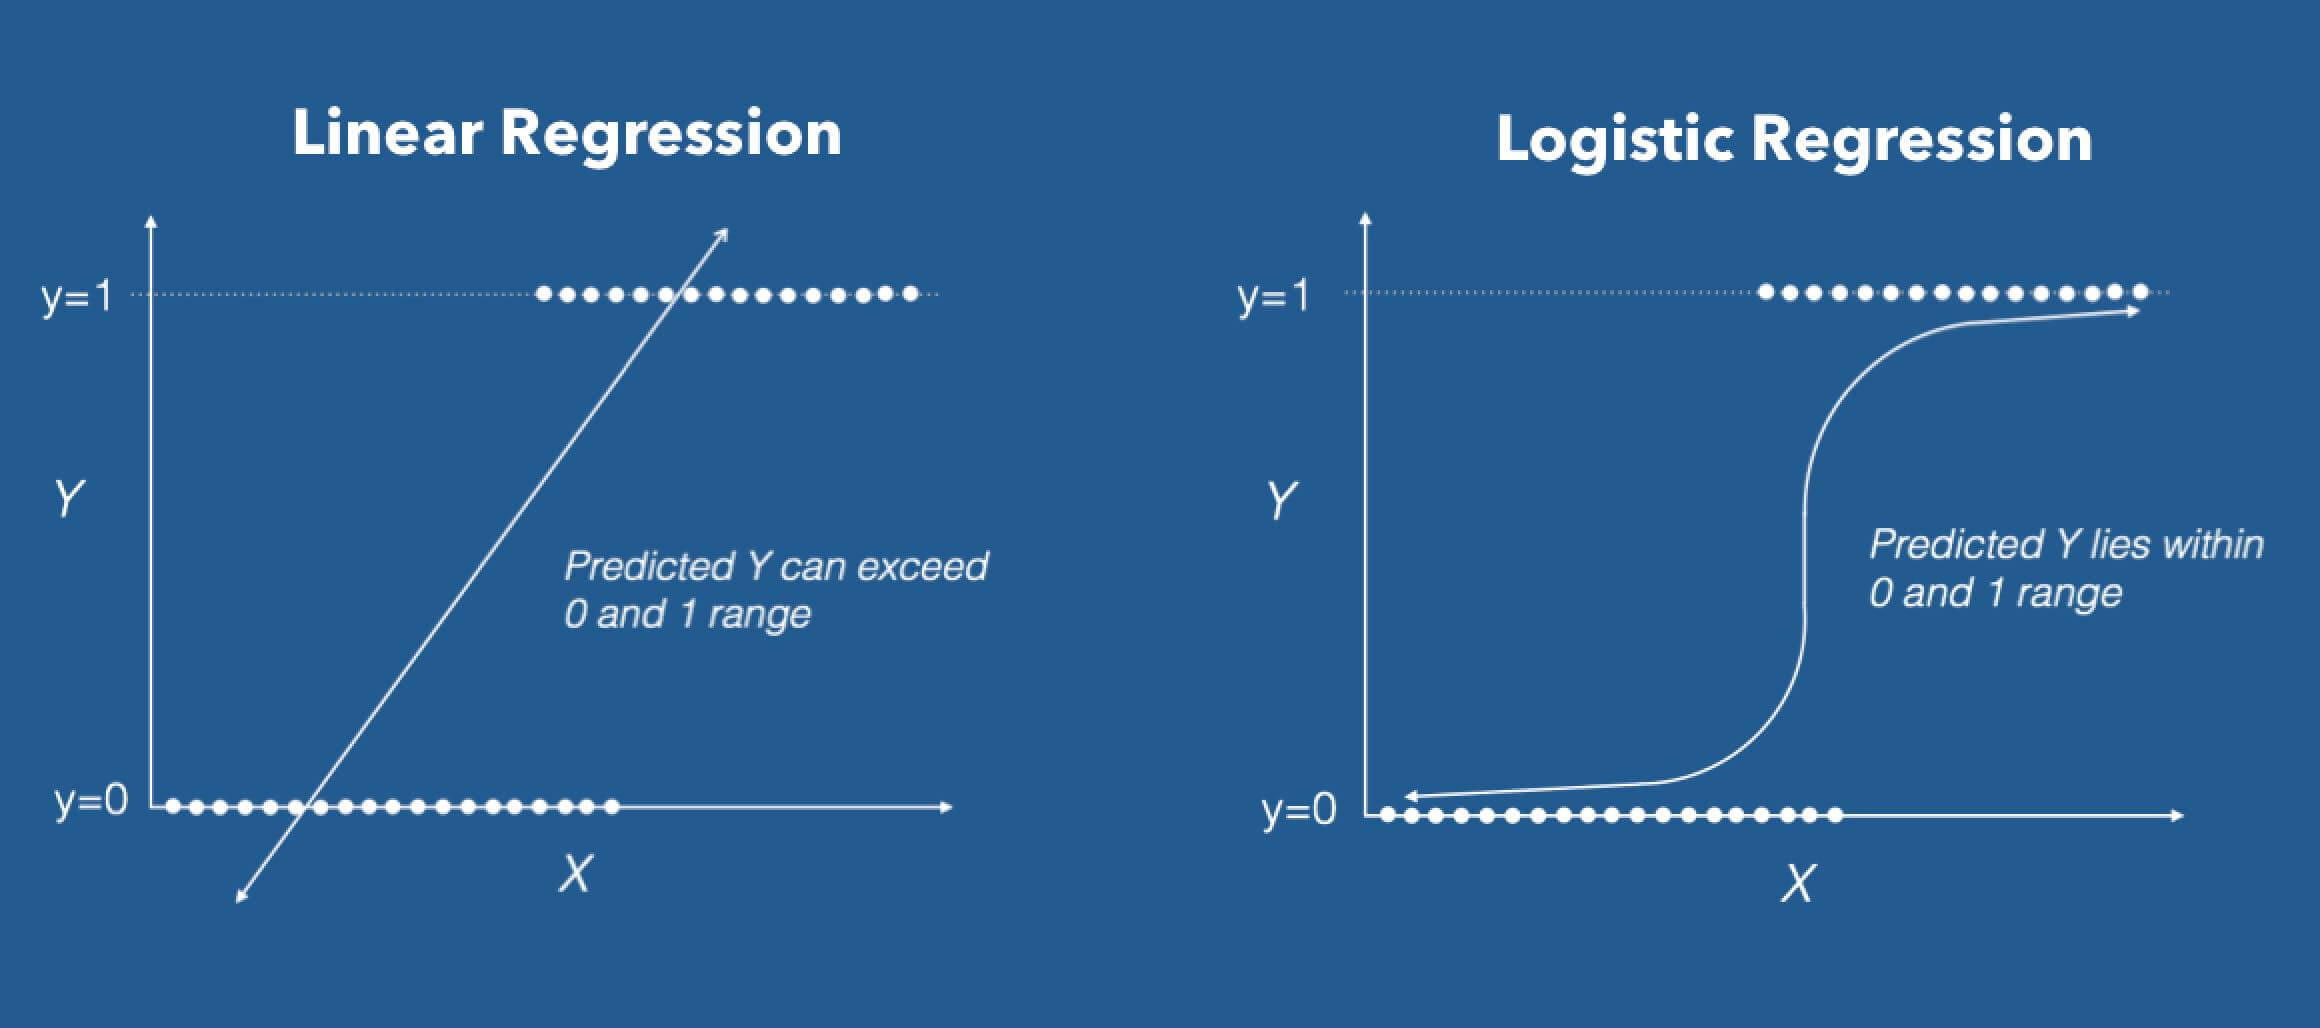

In [1]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Machine Learning/images/LOgistic regression.jpg')

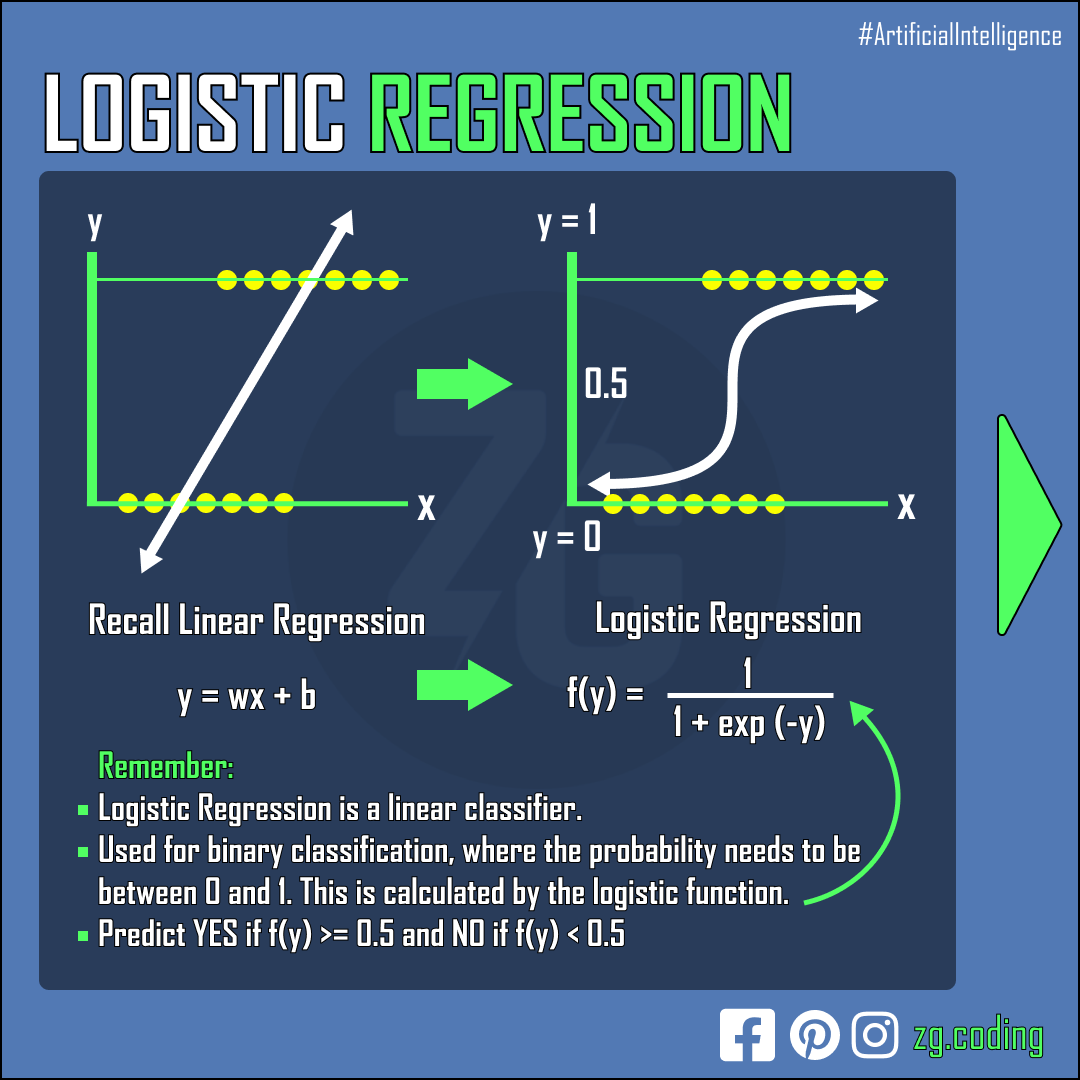

In [2]:
Image(filename='/content/drive/MyDrive/Machine Learning/images/LogisticRegression.png')

- The cost function of logistic regression limits values b/w 0 to 1 and this is not possible with sigmoid function and not plssible by regular linear function

 f(X) = 1/1+e^-(x)

 Y = 1/1+e^-(B0+B1*x) we call it also as the prediction function , when we pass inputs through this prediction function it returns probalility scores b/w 0 and 1.

- By setting threshold we Convert probalility value to different value to different classes

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Data = pd.read_csv('https://raw.githubusercontent.com/Abeyaantrix2Internship/intern/main/Social_Network_Ads.csv') 
Data.head()
#age and estimated salary columns are features(predictors)
# purchase columns is target

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
Data.describe(include='all')

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


In [6]:
#split data into predictors and targets
Predictors= Data.iloc[:,2:4]
Target= Data.iloc[:,-1:]
print(Predictors.head())
print(Target.head())

   Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000
   Purchased
0          0
1          0
2          0
3          0
4          0


In [7]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
X=SS.fit_transform(Predictors)
print(X)

[[-1.78179743 -1.49004624]
 [-0.25358736 -1.46068138]
 [-1.11320552 -0.78528968]
 [-1.01769239 -0.37418169]
 [-1.78179743  0.18375059]
 [-1.01769239 -0.34481683]
 [-1.01769239  0.41866944]
 [-0.54012675  2.35674998]
 [-1.20871865 -1.07893824]
 [-0.25358736 -0.13926283]
 [-1.11320552  0.30121002]
 [-1.11320552 -0.52100597]
 [-1.6862843   0.47739916]
 [-0.54012675 -1.51941109]
 [-1.87731056  0.35993973]
 [-0.82666613  0.30121002]
 [ 0.89257019 -1.3138571 ]
 [ 0.70154394 -1.28449224]
 [ 0.79705706 -1.22576253]
 [ 0.98808332 -1.19639767]
 [ 0.70154394 -1.40195167]
 [ 0.89257019 -0.60910054]
 [ 0.98808332 -0.84401939]
 [ 0.70154394 -1.40195167]
 [ 0.79705706 -1.37258681]
 [ 0.89257019 -1.46068138]
 [ 1.08359645 -1.22576253]
 [ 0.89257019 -1.16703281]
 [-0.82666613 -0.78528968]
 [-0.63563988 -1.51941109]
 [-0.63563988  0.12502088]
 [-1.01769239  1.97500684]
 [-1.59077117 -1.5781408 ]
 [-0.92217926 -0.75592482]
 [-1.01769239  0.59485858]
 [-0.25358736 -1.25512738]
 [-0.44461362 -1.22576253]
 

In [8]:
#feature engineering
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X, Target,test_size=0.2,random_state=0)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(320, 2) (320, 1)
(80, 2) (80, 1)


In [9]:
# logistic regression classifier
from sklearn.linear_model import LogisticRegression
Logistic= LogisticRegression(random_state=0)
Logistic.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [10]:
Logistic.intercept_ , Logistic.coef_

(array([-0.98533791]), array([[2.03510232, 1.06602972]]))

In [11]:
Y_predicted= Logistic.predict(X_test)

In [12]:
#confusion matrix
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(Y_test,Y_predicted)
print(CM)

[[57  1]
 [ 5 17]]


In [13]:
Accuracy=((CM[0,0]+CM[1,1])/sum(sum(CM)))*100
print('accuracy of model=',Accuracy,"%")
Precision= (CM[0,0]/(CM[0,0]+CM[1,0]))*100
print('precision of model=',Precision,'%')
Recall=(CM[0,0]/(CM[0,0]+CM[0,1]))*100
print('Recall of model=',Recall,'%')
print('F-Score of model=',(2*Precision*Recall/(Precision+Recall)),'%')

accuracy of model= 92.5 %
precision of model= 91.93548387096774 %
Recall of model= 98.27586206896551 %
F-Score of model= 95.0 %


In [14]:
from sklearn.metrics import precision_recall_fscore_support
P,RC,F1,Array= precision_recall_fscore_support(Y_test, Y_predicted)

In [15]:
print("precesion=",P[0],'\n','Recall=',RC[0],'\n','F-Score=',F1[0])

precesion= 0.9193548387096774 
 Recall= 0.9827586206896551 
 F-Score= 0.95
